In [1]:
import fxcmpy
import pandas as pd
import numpy as np
import datetime as dt

#we import the functions of the Bollinger band
from pyti.bollinger_bands import upper_bollinger_band as ubb
from pyti.bollinger_bands import middle_bollinger_band as mbb
from pyti.bollinger_bands import lower_bollinger_band as lbb
from pyti.bollinger_bands import percent_bandwidth as percent_b
from mpl_finance import candlestick2_ohlc
#import plots and styling
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
socket=fxcmpy.fxcmpy(config_file = 'fxcm.cfg')
print(socket.get_instruments_for_candles())

['AUD/CAD', 'AUD/CHF', 'AUD/JPY', 'AUD/NZD', 'AUD/USD', 'AUS200', 'Bund', 'CAD/CHF', 'CAD/JPY', 'CHF/JPY', 'CHN50', 'Copper', 'ESP35', 'EUR/AUD', 'EUR/CAD', 'EUR/CHF', 'EUR/GBP', 'EUR/JPY', 'EUR/NOK', 'EUR/NZD', 'EUR/SEK', 'EUR/TRY', 'EUR/USD', 'EUSTX50', 'FRA40', 'GBP/AUD', 'GBP/CAD', 'GBP/CHF', 'GBP/JPY', 'GBP/NZD', 'GBP/USD', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'NGAS', 'NZD/CAD', 'NZD/CHF', 'NZD/JPY', 'NZD/USD', 'SOYF', 'SPX500', 'TRY/JPY', 'UK100', 'UKOil', 'US30', 'USD/CAD', 'USD/CHF', 'USD/CNH', 'USD/HKD', 'USD/JPY', 'USD/MXN', 'USD/NOK', 'USD/SEK', 'USD/TRY', 'USD/ZAR', 'USDOLLAR', 'USOil', 'XAG/USD', 'XAU/USD', 'ZAR/JPY', 'BTC/USD', 'US2000', 'WHEATF', 'CORNF', 'EMBasket', 'JPYBasket', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'XRP/USD']


In [3]:
data = socket.get_candles(instrument = 'EUR/USD', period = 'm30', start = dt.datetime(2019,1,1), end = dt.datetime(2019,5,31))

In [4]:
# data['smoothed_bid'] = (data.bidclose+data.bidopen)/2
# data['smoothed_ask'] = (data.askclose+data.askopen)/2
data['mid_close'] = (data.askclose+data.bidclose)/2

In [5]:
# data['smoothed_bid_mva2'] = data['smoothed_bid'].rolling(2).mean()
# data['smoothed_bid_mva4'] = data['smoothed_bid'].rolling(4).mean()
# data['smoothed_bid_mva5'] = data['smoothed_bid'].rolling(5).mean()
data['mid_close_mva2'] = data['mid_close'].rolling(2).mean()
data['mid_close_mva4'] = data['mid_close'].rolling(4).mean()
data['mid_close_mva5'] = data['mid_close'].rolling(5).mean()

In [19]:
# fig, ax = plt.subplots(figsize=(15, 12))
# plt.xlabel("Date")
# plt.ylabel("Price")
# candlestick2_ohlc(ax, data.bidopen[0:1000], data.bidhigh[0:1000], data.bidlow[0:1000], data.bidclose[0:1000], width=1, colorup='g')
# ax.plot(data['smoothed_bid_mva4'].values[0:1000], color = 'b')
# plt.show()

In [ ]:
# import plotly.plotly as py
# import plotly.graph_objs as go0

In [ ]:
# trace = go.Candlestick(open=data.bidopen, high=data.bidhigh, low=data.bidlow, close=data.bidclose)
# datax = [trace]

# datax.append(dict(y=data.smoothed_bid_mva10, type='scatter', yaxis='y1', 
#                          line = dict( width = 2 ),
#                          marker=dict(color='#800000'), hoverinfo='none', 
#                          legendgroup='Average', name='average') )

# py.iplot(datax, filename='simple_candlestick')

In [6]:
def getSlope(x):
    n = len(x)
    y = np.arange(1, n+1, 1)
    slope,_ = np.polyfit(x, y, deg=1)
    return slope

In [35]:
data['slope'] = data.mid_close_mva2.rolling(10).apply(getSlope)

C:\Users\Jameel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


In [36]:
data.dropna(axis=0, inplace=True)

In [37]:
def labelChange(df, colname):
    df['changeDetected'] = 0
    sign = 0
    df.reset_index(drop=False, inplace=True)
    for i, row in df.iterrows():
        sign_l = np.sign(row['slope'])
        print("Previous sign: {}  and current sign: {}".format(sign, sign_l))
        if row['slope'] > 1500 or row['slope']<-1500:
            if abs(sign_l+sign)>500:
                sign = sign_l
                df['changeDetected'].iloc[i:i+1,] = 1
            elif sign_l<=0 and sign>=0:
                sign = sign_l
                df['changeDetected'].iloc[i:i+1,] = -1
            else:
                df['changeDetected'].iloc[i:i+1,] = 0
        else:
            df['changeDetected'].iloc[i:i+1,] = 0
    return df

In [10]:
data = labelChange(df=data, colname='slope')

Previous sign: 0  and current sign: 1.0
Previous sign: 0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0


C:\Users\Jameel\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 

Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous si

Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous s

Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Pre

Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0 

Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous s

Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Pre

Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Pre

Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  a

Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous s

Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous

Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
P

Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous s

Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previou

Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous 

Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and cu

Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  a

Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Pre

Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  an

Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 

Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previou

Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previou

Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: 1.0
Previous sign: 1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previous sign: -1.0  and current sign: -1.0
Previo

In [23]:
data.head()

,date,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,mid_close,mid_close_mva2,mid_close_mva4,mid_close_mva5,slope,changeDetected
0,2019-01-02 07:00:00,1.14846,1.14825,1.14925,1.14812,1.14862,1.14840,1.14939,1.14825,7564,1.148325,1.148433,1.148524,1.147978,245.846715,0
1,2019-01-02 07:30:00,1.14825,1.14759,1.14841,1.14731,1.14840,1.14775,1.14857,1.14744,8182,1.147670,1.147998,1.148489,1.148353,-1743.757055,-1
2,2019-01-02 08:00:00,1.14759,1.14525,1.14774,1.14487,1.14775,1.14541,1.14788,1.14503,15156,1.145330,1.146500,1.147466,1.147857,-791.705756,0
3,2019-01-02 08:30:00,1.14525,1.14473,1.14526,1.14280,1.14541,1.14489,1.14541,1.14295,18701,1.144810,1.145070,1.146534,1.146935,-722.255894,0
4,2019-01-02 09:00:00,1.14473,1.14366,1.14491,1.14350,1.14489,1.14381,1.14505,1.14364,13887,1.143735,1.144273,1.145386,1.145974,-744.499875,0


In [27]:
buy_prices = []
sell_prices = []
data['_long'] = 0
data['_short'] = 0
last_price_buy = 0
last_price_sell = 0


for i, row in data.iterrows():
    change_l = row['changeDetected']
    
    if change_l==1:
        curr_price = row['bidclose']
        buy_prices.append(row['bidclose'])
        if last_price_sell==0:
            last_price_sell = curr_price
            
        last_price_buy = curr_price
        _long = (curr_price - last_price_sell)*10000
        data['_long'].iloc[i, ] = _long
        print("Buying point buy price is {},the last sell price was {}, and difference is {}".format(curr_price,last_price_sell, (curr_price - last_price_sell)*10000))
    elif change_l==-1:
        curr_price = row['bidclose']
        sell_prices.append(row['bidclose'])
        if last_price_buy==0:
            last_price_buy = curr_price
            
        last_price_sell = curr_price
        _short = (curr_price - last_price_buy)*10000
        data['_short'].iloc[i, ] = _short
        print("Seling point sell price is {},the buy price was {}, and difference is {}".format(curr_price,last_price_buy, (curr_price - last_price_buy)*10000))
    else:
        pass

C:\Users\Jameel\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Seling point sell price is 1.13298,the buy price was 1.13298, and difference is 0.0
Buying point buy price is 1.13751,the last sell price was 1.13298, and difference is 45.29999999999923
Seling point sell price is 1.13907,the buy price was 1.13751, and difference is 15.600000000000058
Buying point buy price is 1.14051,the last sell price was 1.13907, and difference is 14.399999999998858
Seling point sell price is 1.14033,the buy price was 1.14051, and difference is -1.7999999999984695
Buying point buy price is 1.14096,the last sell price was 1.14033, and difference is 6.299999999999084
Seling point sell price is 1.14159,the buy price was 1.14096, and difference is 6.300000000001305
Buying point buy price is 1.1438,the last sell price was 1.14159, and difference is 22.099999999998232
Seling point sell price is 1.14385,the buy price was 1.1438, and difference is 0.5000000000010552
Buying point buy price is 1.14667,the last sell price was 1.14385, and difference is 28.200000000000447
Seli

Buying point buy price is 1.14441,the last sell price was 1.14393, and difference is 4.8000000000003595
Seling point sell price is 1.14306,the buy price was 1.14441, and difference is -13.499999999999623
Buying point buy price is 1.14301,the last sell price was 1.14306, and difference is -0.4999999999988347
Seling point sell price is 1.14249,the buy price was 1.14301, and difference is -5.20000000000076
Buying point buy price is 1.14845,the last sell price was 1.14249, and difference is 59.59999999999965
Seling point sell price is 1.14954,the buy price was 1.14845, and difference is 10.900000000000354
Buying point buy price is 1.14938,the last sell price was 1.14954, and difference is -1.5999999999993797
Seling point sell price is 1.14432,the buy price was 1.14938, and difference is -50.60000000000065
Buying point buy price is 1.14459,the last sell price was 1.14432, and difference is 2.6999999999999247
Seling point sell price is 1.14414,the buy price was 1.14459, and difference is -4.

Seling point sell price is 1.13386,the buy price was 1.13391, and difference is -0.4999999999988347
Buying point buy price is 1.13382,the last sell price was 1.13386, and difference is -0.40000000000040004
Seling point sell price is 1.13356,the buy price was 1.13382, and difference is -2.60000000000149
Buying point buy price is 1.13424,the last sell price was 1.13356, and difference is 6.800000000000139
Seling point sell price is 1.13409,the buy price was 1.13424, and difference is -1.4999999999987246
Buying point buy price is 1.1339,the last sell price was 1.13409, and difference is -1.900000000001345
Seling point sell price is 1.13364,the buy price was 1.1339, and difference is -2.5999999999992696
Buying point buy price is 1.1345,the last sell price was 1.13364, and difference is 8.60000000000083
Seling point sell price is 1.13354,the buy price was 1.1345, and difference is -9.600000000000719
Buying point buy price is 1.13471,the last sell price was 1.13354, and difference is 11.7000

Seling point sell price is 1.13159,the buy price was 1.12984, and difference is 17.500000000001403
Buying point buy price is 1.13125,the last sell price was 1.13159, and difference is -3.4000000000000696
Seling point sell price is 1.13154,the buy price was 1.13125, and difference is 2.8999999999990145
Buying point buy price is 1.13162,the last sell price was 1.13154, and difference is 0.8000000000008001
Seling point sell price is 1.12686,the buy price was 1.13162, and difference is -47.600000000000975
Buying point buy price is 1.12748,the last sell price was 1.12686, and difference is 6.200000000000649
Seling point sell price is 1.12522,the buy price was 1.12748, and difference is -22.599999999999287
Buying point buy price is 1.12565,the last sell price was 1.12522, and difference is 4.299999999999304
Seling point sell price is 1.12706,the buy price was 1.12565, and difference is 14.099999999999113
Buying point buy price is 1.12515,the last sell price was 1.12706, and difference is -19

Buying point buy price is 1.1242,the last sell price was 1.12398, and difference is 2.20000000000109
Seling point sell price is 1.12484,the buy price was 1.1242, and difference is 6.399999999999739
Buying point buy price is 1.12508,the last sell price was 1.12484, and difference is 2.4000000000001798
Seling point sell price is 1.12562,the buy price was 1.12508, and difference is 5.399999999999849
Buying point buy price is 1.12591,the last sell price was 1.12562, and difference is 2.8999999999990145
Seling point sell price is 1.1249,the buy price was 1.12591, and difference is -10.099999999999554
Buying point buy price is 1.12556,the last sell price was 1.1249, and difference is 6.599999999998829
Seling point sell price is 1.12115,the buy price was 1.12556, and difference is -44.09999999999803
Buying point buy price is 1.12127,the last sell price was 1.12115, and difference is 1.1999999999989797
Seling point sell price is 1.12211,the buy price was 1.12127, and difference is 8.3999999999

Seling point sell price is 1.11536,the buy price was 1.11538, and difference is -0.20000000000131024
Buying point buy price is 1.11593,the last sell price was 1.11536, and difference is 5.700000000001815
Seling point sell price is 1.11667,the buy price was 1.11593, and difference is 7.399999999999629
Buying point buy price is 1.11658,the last sell price was 1.11667, and difference is -0.9000000000014552
Seling point sell price is 1.11641,the buy price was 1.11658, and difference is -1.7000000000000348
Buying point buy price is 1.11581,the last sell price was 1.11641, and difference is -5.999999999999339
Seling point sell price is 1.11602,the buy price was 1.11581, and difference is 2.100000000000435
Buying point buy price is 1.11589,the last sell price was 1.11602, and difference is -1.2999999999996348
Seling point sell price is 1.11664,the buy price was 1.11589, and difference is 7.500000000000284
Buying point buy price is 1.116,the last sell price was 1.11664, and difference is -6.39

In [19]:
data.shape

(2594, 19)

In [28]:
data.to_excel('data_CLOSE_w_4_6mts_h1_v3.xlsx', index = False)

In [29]:
data.columns

Index(['level_0', 'index', 'date', 'bidopen', 'bidclose', 'bidhigh', 'bidlow',
       'askopen', 'askclose', 'askhigh', 'asklow', 'tickqty', 'mid_close',
       'mid_close_mva2', 'mid_close_mva4', 'mid_close_mva5', 'slope',
       'changeDetected', '_long', '_short', 'cum_long', 'cum_short'],
      dtype='object')

In [30]:
data['cum_long'] = data['_long'].cumsum()
data['cum_short'] = data['_short'].cumsum()

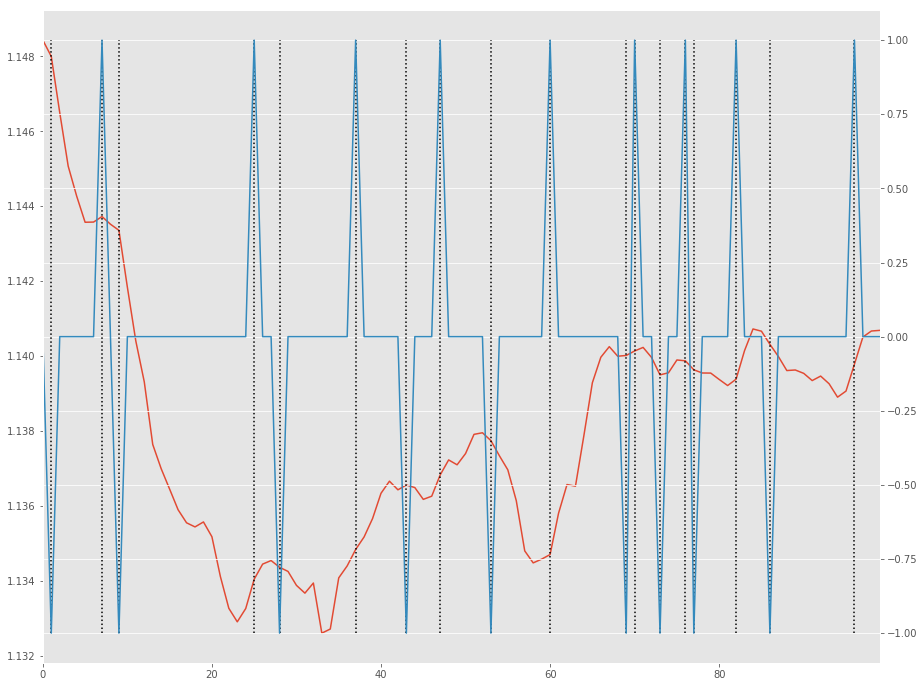

In [34]:
data['mid_close_mva2'][0:100].plot(figsize = (15,12))
# data['slope'][0:100].plot(secondary_y = True)
data['changeDetected'][0:100].plot(secondary_y = True)
plt.vlines(data[data['changeDetected']!=0].index, ymin=-1, ymax=1, linestyles='dotted')

In [26]:
data.head(100)

,date,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,mid_close,mid_close_mva2,mid_close_mva4,mid_close_mva5,slope,changeDetected
0,2019-01-02 07:00:00,1.14846,1.14825,1.14925,1.14812,1.14862,1.14840,1.14939,1.14825,7564,1.148325,1.148433,1.148524,1.147978,245.846715,0
1,2019-01-02 07:30:00,1.14825,1.14759,1.14841,1.14731,1.14840,1.14775,1.14857,1.14744,8182,1.147670,1.147998,1.148489,1.148353,-1743.757055,-1
2,2019-01-02 08:00:00,1.14759,1.14525,1.14774,1.14487,1.14775,1.14541,1.14788,1.14503,15156,1.145330,1.146500,1.147466,1.147857,-791.705756,0
3,2019-01-02 08:30:00,1.14525,1.14473,1.14526,1.14280,1.14541,1.14489,1.14541,1.14295,18701,1.144810,1.145070,1.146534,1.146935,-722.255894,0
4,2019-01-02 09:00:00,1.14473,1.14366,1.14491,1.14350,1.14489,1.14381,1.14505,1.14364,13887,1.143735,1.144273,1.145386,1.145974,-744.499875,0
5,2019-01-02 09:30:00,1.14366,1.14334,1.14414,1.14214,1.14381,1.14348,1.14427,1.14228,13145,1.143410,1.143573,1.144321,1.144991,-1406.078435,0
6,2019-01-02 10:00:00,1.14334,1.14367,1.14375,1.14313,1.14348,1.14382,1.14389,1.14327,9700,1.143745,1.143578,1.143925,1.144206,-1575.719594,0
7,2019-01-02 10:30:00,1.14367,1.14363,1.14411,1.14346,1.14382,1.14378,1.14425,1.14362,8115,1.143705,1.143725,1.143649,1.143881,1593.625498,1
8,2019-01-02 11:00:00,1.14363,1.14326,1.14383,1.14239,1.14378,1.14341,1.14398,1.14253,9529,1.143335,1.143520,1.143549,1.143586,-1036.218779,0
9,2019-01-02 11:30:00,1.14326,1.14331,1.14371,1.14312,1.14341,1.14345,1.14385,1.14327,6451,1.143380,1.143358,1.143541,1.143515,-5351.842550,-1
